In [125]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import plotly.express as px

## District dataset univariate analysis

In [4]:
# read in districts data
districts = pd.read_csv('data/districts_info.csv')
print(len(districts))
districts

233


,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000["
1,2685,NaN,NaN,NaN,NaN,NaN,NaN
2,4921,Utah,Suburb,"[0, 0.2[","[0.2, 0.4[","[0.18, 1[","[6000, 8000["
3,3188,NaN,NaN,NaN,NaN,NaN,NaN
4,2238,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
228,9515,New York,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[18000, 20000["
229,8103,Tennessee,Rural,"[0.2, 0.4[",NaN,"[0.18, 1[","[8000, 10000["
230,4929,Virginia,Rural,"[0, 0.2[","[0.4, 0.6[","[0.18, 1[","[12000, 14000["
231,7975,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN


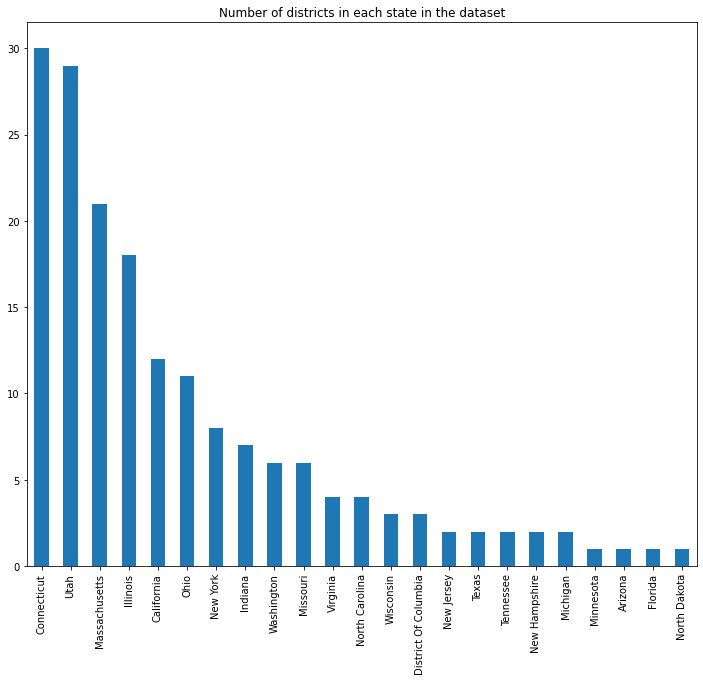

In [14]:
# plot districts in each state
plt.figure(figsize=(12,10))
districts['state'].value_counts().plot(kind='bar')
plt.title('Number of districts in each state in the dataset')
plt.show()


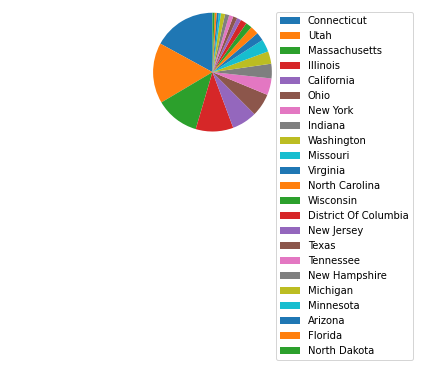

In [65]:
# plot districts in each state
ds = districts['state'].value_counts().reset_index()
ds.columns = [
    'State', 
    'percent'
]
tot = ds['percent'].sum()
ds['percent'] /= tot

labels = ds['State']
sizes = ds['percent']
patches, texts = plt.pie(sizes, startangle=90, normalize=False)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.show()

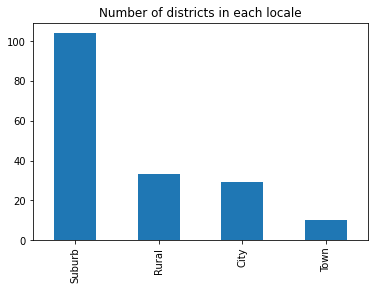

In [20]:
# plot districts by locale
districts['locale'].value_counts().plot(kind='bar')
plt.title('Number of districts in each locale')
plt.show()

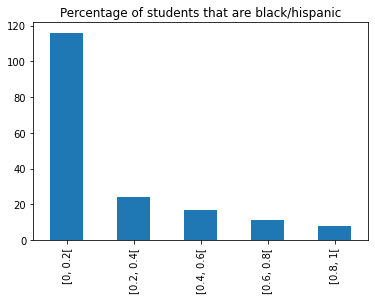

In [19]:
# plot per-district percentages of black and hispanic students
districts['locale'].value_counts().plot(kind='bar')
plt.title('Number of districts in each locale')
plt.show()districts['pct_black/hispanic'].value_counts().plot(kind='bar')
plt.title('Percentage of students that are black/hispanic')
plt.show()

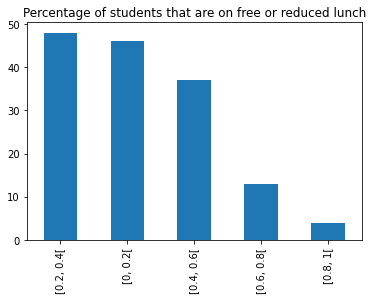

In [18]:
# plot per-district percentages of students on free or reduced lunch
districts['pct_free/reduced'].value_counts().plot(kind='bar')
plt.title('Percentage of students that are on free or reduced lunch')
plt.show()
# TODO: sort x-axis

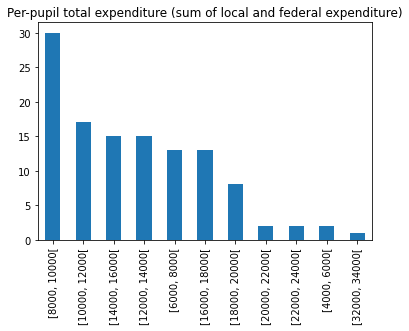

In [21]:
# plot per-district per-pupil total expenditure
districts['pp_total_raw'].value_counts().plot(kind='bar')
plt.title('Per-pupil total expenditure (sum of local and federal expenditure)')
plt.show()

## Product dataset univariate analysis

In [3]:
# read in products data
products = pd.read_csv('data/products_info.csv')
print(len(products))
products

372


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
...,...,...,...,...,...,...
367,88065,https://dochub.com/,DocHub,DocHub,PreK-12; Higher Ed; Corporate,SDO - Other
368,37805,http://google.com/slides/about/,Google Slides,Google LLC,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation
369,32555,http://www.innersloth.com/gameAmongUs.php,Among Us,InnerSloth,PreK-12; Higher Ed,"LC - Sites, Resources & Reference - Games & Si..."
370,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN


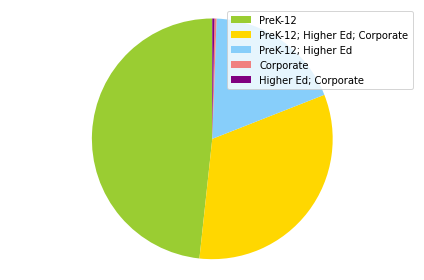

In [58]:
# plot proportions of products by sector
ds = products['Sector(s)'].value_counts().reset_index()
ds.columns = [
    'Sector(s)', 
    'percent'
]
tot = ds['percent'].sum()
ds['percent'] /= tot

labels = ds['Sector(s)']
sizes = ds['percent']
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'purple']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()

plt.show()

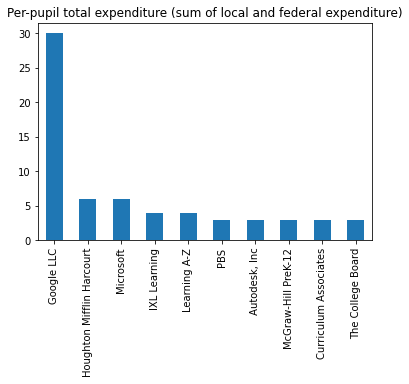

In [118]:
# plot top 10 companies
products['Provider/Company Name'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Per-pupil total expenditure (sum of local and federal expenditure)')
plt.show()

## Engagement dataset univariate analysis

In [71]:
# read in district-level engagement data
engagement = pd.DataFrame()
directory = 'data/engagement_data/'
for filename in os.listdir(directory):
    district_id = filename.split('.')[0]
    dist_df = pd.read_csv(directory + filename)
    dist_df['district_id'] = district_id
    engagement=pd.concat([engagement, dist_df], axis=0)
print(len(engagement))
engagement

22324190


,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-01,29322.0,0.04,1.30,3188
1,2020-01-01,57084.0,0.04,0.43,3188
2,2020-01-01,99916.0,0.09,5.20,3188
3,2020-01-01,58235.0,0.00,NaN,3188
4,2020-01-01,11585.0,0.04,1.30,3188
...,...,...,...,...,...
36572,2020-12-31,47364.0,0.30,82.44,7308
36573,2020-12-31,98102.0,0.00,NaN,7308
36574,2020-12-31,72468.0,0.00,NaN,7308
36575,2020-12-31,65277.0,0.00,NaN,7308


In [81]:
# group engagement data by day
engagement_grpd = engagement.groupby('time')[['pct_access', 'engagement_index']].mean().reset_index()
engagement_grpd

,time,pct_access,engagement_index
0,2020-01-01,0.104183,16.770190
1,2020-01-02,0.472043,85.262349
2,2020-01-03,0.472196,88.263277
3,2020-01-04,0.104635,17.528292
4,2020-01-05,0.136194,23.879479
...,...,...,...
361,2020-12-27,0.098985,40.230635
362,2020-12-28,0.104053,42.768739
363,2020-12-29,0.103783,43.842840
364,2020-12-30,0.102573,44.391145


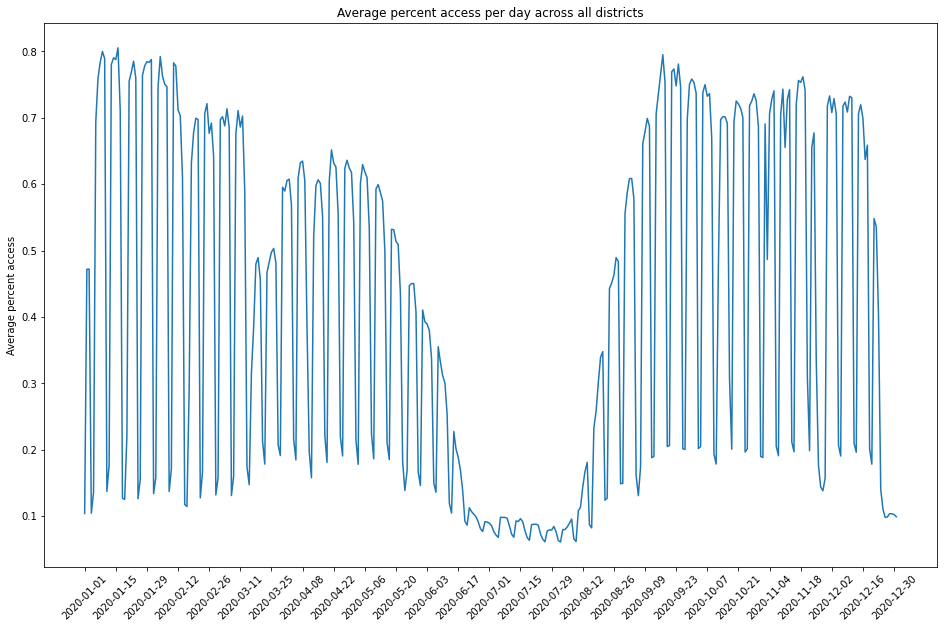

In [111]:
# plot average percentage access across all districts by day
fig, ax = plt.subplots(1,1, figsize=(16,10))
fig = plt.plot(engagement_grpd['time'], engagement_grpd['pct_access'])
plt.title('Average percentage access per day across all districts')
plt.ylabel('Average percentage access')
ax.set_xticks(engagement_grpd['time'][::14])
ax.set_xticklabels(engagement_grpd['time'][::14], rotation=45)
plt.show()

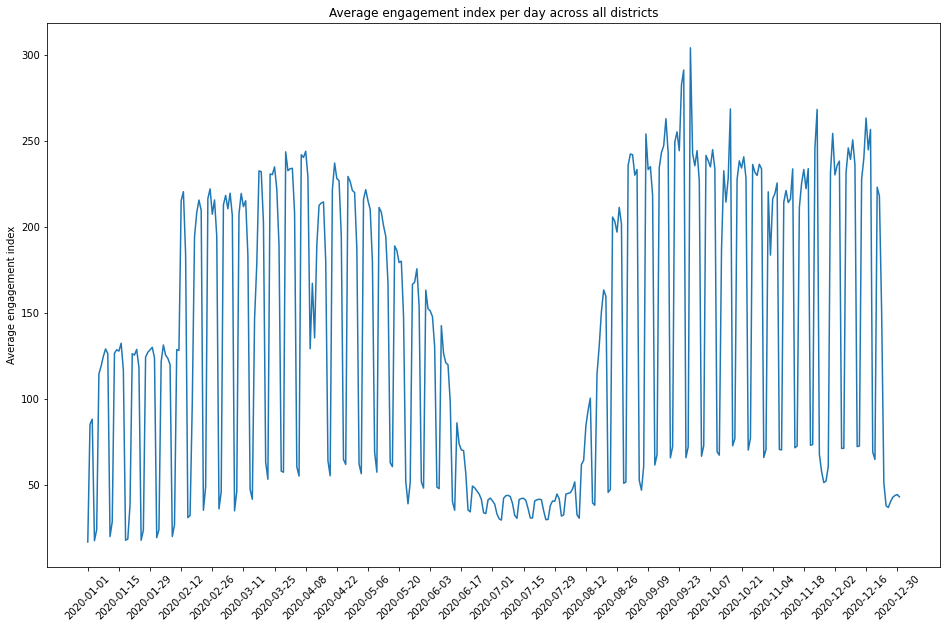

In [112]:
# plot average engagement index across all districts by day
fig, ax = plt.subplots(1,1, figsize=(16,10))
fig = plt.plot(engagement_grpd['time'], engagement_grpd['engagement_index'])
plt.title('Average engagement index per day across all districts')
plt.ylabel('Average engagement index')
ax.set_xticks(engagement_grpd['time'][::14])
ax.set_xticklabels(engagement_grpd['time'][::14], rotation=45)
plt.show()

## Bivariate analysis - districts and engagement data

In [123]:
# merge engagement and districts dfs
engagement['district_id'] = engagement['district_id'].astype(int)
districts_engagement_data = pd.merge(districts, engagement, on = 'district_id')
districts_engagement_data

,district_id,state,locale,pct_black/hispanic,pct_free/reduced,county_connections_ratio,pp_total_raw,time,lp_id,pct_access,engagement_index
0,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-01-27,32213.0,100.00,3000.00
1,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,90153.0,33.33,2666.67
2,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,99916.0,0.00,NaN
3,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,28504.0,0.00,NaN
4,8815,Illinois,Suburb,"[0, 0.2[","[0, 0.2[","[0.18, 1[","[14000, 16000[",2020-02-25,95731.0,33.33,333.33
...,...,...,...,...,...,...,...,...,...,...,...
22324185,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,2020-12-31,43009.0,0.02,8.14
22324186,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,2020-12-31,62984.0,0.00,0.04
22324187,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,2020-12-31,90014.0,0.00,0.04
22324188,7164,California,City,"[0.6, 0.8[","[0.6, 0.8[","[0.18, 1[",NaN,2020-12-31,61945.0,0.29,16.06


In [187]:
def plot_time_series_by_state(df,col1,col2,col3):
    max_list = df[[col1,col2]]\
        .groupby([col1])[col2].mean()\
        .sort_values(ascending=False).index[:22].tolist()

    df = df[df[col1].isin(max_list)]\
                    .reset_index(drop=True)[[col3, col1, col2]]
    df = df.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(df, facet_col=col1, facet_col_wrap=1, facet_row_spacing=0.01, width=800, height=3200)
    fig.update_layout(
                      title=(col1 + ", " + col2 + ", " + col3).title(),
                      title_x=0.39,
                     )
    fig.show()

In [203]:
plot_time_series_by_state(districts_engagement_data,"state","pct_access","time")

In [202]:
plot_time_series_by_state(districts_engagement_data,"state","engagement_index","time")

In [199]:
def plot_time_series_by_locale(df,col1,col2,col3):
    max_list = df[[col1,col2]]\
        .groupby([col1])[col2].mean()\
        .sort_values(ascending=False).index[:22].tolist()

    df = df[df[col1].isin(max_list)]\
                    .reset_index(drop=True)[[col3, col1, col2]]
    df = df.pivot_table(index=col3, columns=col1, values=col2)

    fig = px.line(df, facet_col=col1, facet_col_wrap=1, width=800, height=800)
    fig.update_layout(
                      title=(col1 + ", " + col2 + ", " + col3).title(),
                      title_x=0.48,
                     )
    fig.show()

In [200]:
plot_time_series_by_locale(districts_engagement_data,"locale","pct_access","time")

In [201]:
plot_time_series_by_locale(districts_engagement_data,"locale","engagement_index","time")

## Bivariate analysis - products and engagement data

In [204]:
# merge engagement and products dfs
products_engagement_data = pd.merge(products, engagement, left_on='LP ID', right_on='lp_id')
products_engagement_data

,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function,time,lp_id,pct_access,engagement_index,district_id
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-03,13117.0,0.04,7.37,3188
1,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-13,13117.0,0.04,1.30,3188
2,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-17,13117.0,0.17,9.50,3188
3,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-21,13117.0,0.00,NaN,3188
4,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms,2020-01-23,13117.0,0.00,NaN,3188
...,...,...,...,...,...,...,...,...,...,...,...
11691582,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-27,87841.0,0.02,0.43,4629
11691583,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-28,87841.0,0.03,1.04,4629
11691584,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-29,87841.0,0.03,1.38,4629
11691585,87841,http://edpuzzle.com,Edpuzzle - Free (Basic Plan),EDpuzzle Inc.,NaN,NaN,2020-12-30,87841.0,0.03,0.60,4629
